## Plot Noise Ceiling estmates for each ROI

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import utils

plt.rcParams['figure.dpi'] = 200
plt.rc('font', size=12)
plt.rcParams["font.family"] = "Times New Roman"

print("Finished importing")

Finished importing


In [2]:
roi_ls = ["V1", "V2", "V4", "LO", "TO", "VO", "PHC"]
sub="sub1"
roi_pth = "./outputs/{}_{}_NC.pkl"

In [4]:
nc_mean, nc_std = [], []
nc_full = []
for r_i in range(len(roi_ls)):
    pth = roi_pth.format(sub, roi_ls[r_i])
    dat = utils.pickle_load(pth)
    mean = np.mean(dat)
    std = np.std(dat)

    nc_full.append(dat)
    nc_mean.append(mean)
    nc_std.append(std)

for r_i in range(len(roi_ls)):
    print(f"{roi_ls[r_i]} NC: {nc_mean[r_i]} +- {nc_std[r_i]}")

loading from: ./outputs/sub1_V1_NC.pkl
loading from: ./outputs/sub1_V2_NC.pkl
loading from: ./outputs/sub1_V4_NC.pkl
loading from: ./outputs/sub1_LO_NC.pkl
loading from: ./outputs/sub1_TO_NC.pkl
loading from: ./outputs/sub1_VO_NC.pkl
loading from: ./outputs/sub1_PHC_NC.pkl
V1 NC: 31.063741768211514 +- 24.00604087340464
V2 NC: 29.940778592417242 +- 23.861822472319357
V4 NC: 31.82056514797025 +- 18.78449009435015
LO NC: 29.331397110284957 +- 14.949684374805338
TO NC: 43.04311100931301 +- 20.411452034413582
VO NC: 31.591536738325452 +- 15.550796130020963
PHC NC: 30.0386982252595 +- 17.22099768993486


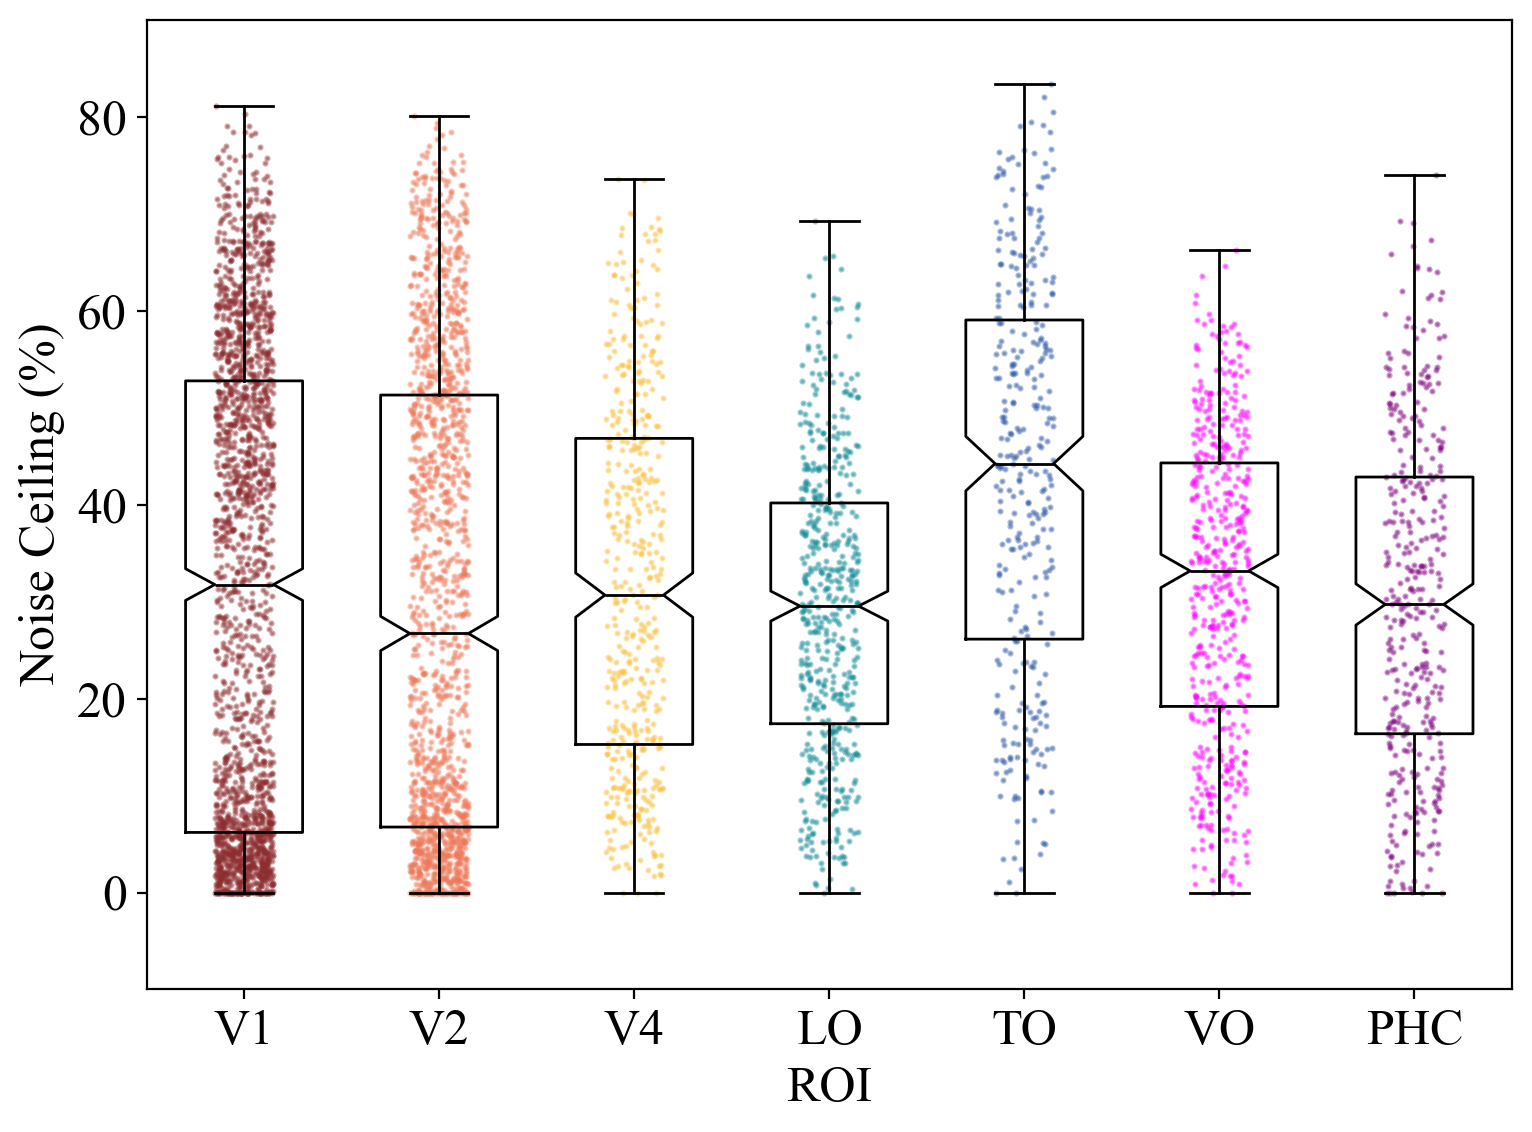

In [5]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(8, 6))

bp = plt.boxplot(nc_full, True, vert=True, patch_artist=False,
                 labels=[roi_ls[i] for i in range(len(roi_ls))],
                 widths=0.6)

for median in bp['medians']:
    median.set_color('black')

clrs = [utils.COLOR_PALETTE[r] for r in roi_ls]

x_coords = [np.random.uniform(low=-0.15, high=0.15, size=(len(nc_full[i]), )) for i in range(len(nc_full))]
off_set = [i for i in range(1, len(roi_ls) + 1)]
for r_i in range(len(roi_ls)):
    plt.scatter(x_coords[r_i] + off_set[r_i], nc_full[r_i],
                color=clrs[r_i], alpha = 0.4,  s=1.5)

plt.xlabel("ROI")
plt.ylabel("Noise Ceiling (%)")
plt.ylim(-10, 90)

plt.tight_layout()
